In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import numpy as np

import seaborn as sns
from os import path
from PIL import Image

In [2]:
data = pd.read_csv("Dataseti\GrammarandProductReviews.csv")

In [3]:
data = data[data['reviews.didPurchase'].notna()]
data = data[data['reviews.text'].notna()]

In [4]:
reviews = data['reviews.text']
y = data['reviews.didPurchase']

In [5]:
text = data['reviews.text']
reviews = []
for i in range(len(text)):
    reviews.append(str(text.get(i)))

reviewText = ""

for i in range(len(reviews)):
    reviewText = " ".join(reviews)

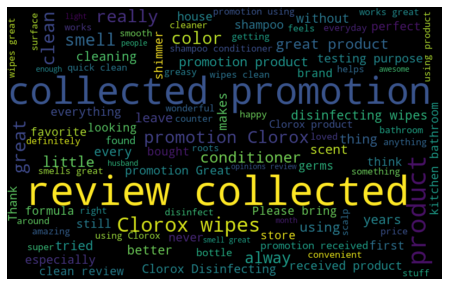

In [6]:
wordcloud = WordCloud(width=800, height=500, max_words=100, background_color="black", min_word_length=5).generate(reviewText)

fig=plt.figure(figsize=(8, 5))
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

wordcloud.to_file("wordcloud.jpeg")

In [7]:
# create a dictionary of word frequencies
text_dictionary = wordcloud.process_text(reviewText)

# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wordcloud.words_

#print results
# print(list(word_freq.items())[:10])
pd.DataFrame({'frequency':rel_freq}).sort_values('frequency',ascending=False).head(10)

,frequency
collected promotion,1.000000
review collected,1.000000
product,0.390636
Clorox wipes,0.214116
clean,0.167575
great,0.166038
really,0.153878
smell,0.147869
color,0.147170
promotion Clorox,0.143256


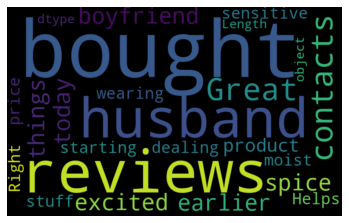

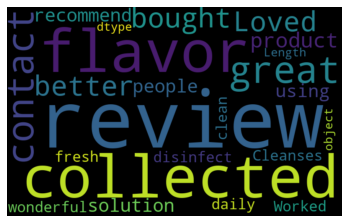

In [8]:
data = data.rename(columns = {'reviews.didPurchase': 'a'}, inplace = False)

dataset_0 = data.query('a == False')
dataset_1 = data.query('a == True')

text_0 = str(dataset_0['reviews.text'])
text_1 = str(dataset_1['reviews.text'])

wordcloud_0 = WordCloud(width=800, height=500, background_color = "black", min_word_length=5).generate(text_0)

wordcloud_1 = WordCloud(width=800, height=500, background_color = "black", min_word_length=5).generate(text_1)

plt.axis("off")
plt.imshow(wordcloud_0, interpolation = 'bilinear')
plt.show()
wordcloud_0.to_file("wordcloud_0.jpeg")

plt.axis("off")
plt.imshow(wordcloud_1, interpolation = 'bilinear')
plt.show()
wordcloud_1.to_file("wordcloud_1.jpeg")

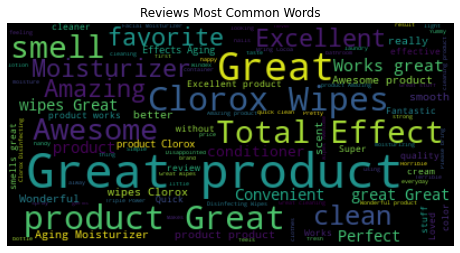

In [9]:
stopwords = set(STOPWORDS)
text = " ".join(str(review) for review in data['reviews.title'])

wordcloud = WordCloud(stopwords=stopwords, background_color="black", max_words=100, min_word_length=5).generate(text)

# visualize the image
fig=plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Reviews Most Common Words')
plt.show()

wordcloud.to_file("reviewTitle.jpeg")